# **CNN Implementation**  

**Author:** Srikar Kalle 

**Student ID:** C00313529


## 🔗 Code Reference:  
The implementation was based on [GitHub - Basic CNN Implementation](https://github.com/SamaSamrin/Basic-CNN-Implementation/blob/main/Basic_CNN_Implementation.ipynb). 

---

# **Change Log**  
---

| SL No. | Change Category          | Description | Duration (mins) | Difficulty (1-10) |
|--------|-------------------------|-------------|----------------|------------------|
| 1      | **Regularization**       | Added Batch Normalization and Dropout layers to prevent overfitting. | 30 | 6 |
| 2      | **Dataset Normalization**| Ensured CIFAR-10 dataset is properly loaded and normalized (scaling pixel values). | 10 | 2 |
| 3      | **Hyperparameter Tuning** | Used Adam optimizer with learning rate tuning (0.001) instead of default settings. | 20 | 5 |
| 4      | **Architecture Enhancement** | Increased model depth with additional Conv2D and MaxPooling layers for better feature extraction. | 40 | 7 |
| 5      | **Logging & Monitoring**   | Integrated TensorBoard for real-time logging and model checkpointing for best validation accuracy. | 25 | 5 |
| 6      | **Evaluation Metrics**    | Added precision, recall, F1-score, and confusion matrix visualization. | 30 | 6 |
| 7      | **Model Serialization**   | Implemented model saving using `.h5` format for deployment readiness. | 15 | 4 |
| **8**  | **Research & Reference**  | The base CNN implementation was taken from [GitHub - Basic CNN Implementation](https://github.com/SamaSamrin/Basic-CNN-Implementation/blob/main/Basic_CNN_Implementation.ipynb). Improvements were inspired by advanced CNN architectures, Kaggle notebooks, and TensorFlow documentation on Batch Normalization & Dropout. | 50 | 5 |
| **9**  | **Debugging & Validation** | Fixed issues related to overfitting, activation function mismatches, and loss convergence. | 45 | 7 |

---

## **Code Improvements**  
✅ **Better Regularization** – Added Batch Normalization & Dropout to enhance generalization.  
✅ **Improved Model Depth** – Increased CNN layers for more complex feature extraction.  
✅ **Hyperparameter Optimization** – Optimized learning rates and optimizer configurations.  
✅ **Logging & Monitoring** – Integrated TensorBoard for better model tracking.  
✅ **Deployment Ready** – Implemented model serialization (`.h5` format) for further use.  


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import datetime

"\n# Load CIFAR-10 dataset\n(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()\n\n# Normalize pixel values\nx_train, x_test = x_train / 255.0, x_test / 255.0\n\n# Define CNN Model\ndef build_model():\n    model = keras.Sequential([\n        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),\n        layers.MaxPooling2D((2, 2)),\n        layers.Conv2D(64, (3, 3), activation='relu'),\n        layers.MaxPooling2D((2, 2)),\n        layers.Flatten(),\n        layers.Dense(64, activation='relu'),\n        layers.Dense(10, activation='softmax')\n    ])\n    return model\n\nmodel = build_model()\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])\n"

In [ ]:
# Original Code (Commented Out)
"""
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN Model
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
"""

In [2]:
# Modified and Enhanced CNN Model
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [3]:
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Srikar K\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Callbacks for logging and checkpointing
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("cnn_model_best.h5", save_best_only=True)

In [8]:
# Train model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback, checkpoint_callback])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4545 - loss: 1.4961

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.4545 - loss: 1.4961 - val_accuracy: 0.5904 - val_loss: 1.1594
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5872 - loss: 1.1871

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5873 - loss: 1.1871 - val_accuracy: 0.6259 - val_loss: 1.0379
Epoch 3/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6498 - loss: 1.0152

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6498 - loss: 1.0152 - val_accuracy: 0.6960 - val_loss: 0.8746
Epoch 4/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6939 - loss: 0.8986

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6939 - loss: 0.8986 - val_accuracy: 0.7010 - val_loss: 0.8660
Epoch 5/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7109 - loss: 0.8452

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.7109 - loss: 0.8452 - val_accuracy: 0.7569 - val_loss: 0.7196
Epoch 6/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7258 - loss: 0.8028

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.7258 - loss: 0.8028 - val_accuracy: 0.7646 - val_loss: 0.7142
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.7454 - loss: 0.7493 - val_accuracy: 0.7510 - val_loss: 0.7559
Epoch 8/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7590 - loss: 0.7184

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.7590 - loss: 0.7184 - val_accuracy: 0.7775 - val_loss: 0.6516
Epoch 9/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7656 - loss: 0.6874

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.7656 - loss: 0.6874 - val_accuracy: 0.7796 - val_loss: 0.6487
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7758 - loss: 0.6566

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.7758 - loss: 0.6566 - val_accuracy: 0.7846 - val_loss: 0.6415
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7847 - loss: 0.6302

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.7847 - loss: 0.6302 - val_accuracy: 0.7900 - val_loss: 0.6284
Epoch 12/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7973 - loss: 0.6031

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 74ms/step - accuracy: 0.7973 - loss: 0.6031 - val_accuracy: 0.8063 - val_loss: 0.5666
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.7993 - loss: 0.5791 - val_accuracy: 0.7912 - val_loss: 0.6253
Epoch 14/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8109 - loss: 0.5501

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.8109 - loss: 0.5501 - val_accuracy: 0.8147 - val_loss: 0.5604
Epoch 15/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8135 - loss: 0.5460

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.8135 - loss: 0.5460 - val_accuracy: 0.8231 - val_loss: 0.5281
Epoch 16/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8193 - loss: 0.5344

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.8192 - loss: 0.5344 - val_accuracy: 0.8315 - val_loss: 0.5178
Epoch 17/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.8233 - loss: 0.5210 - val_accuracy: 0.8274 - val_loss: 0.5269
Epoch 18/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.8304 - loss: 0.5036 - val_accuracy: 0.8194 - val_loss: 0.5620
Epoch 19/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.8302 - loss: 0.5003 - val_accuracy: 0.7794 - val_loss: 0.7332
Epoch 20/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.8401 - loss: 0.4650 - val_accuracy: 0.7894 - val_loss: 0.6474


In [12]:
# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
              precision    recall  f1-score   support

           0       0.88      0.60      0.72      1000
           1       0.96      0.88      0.91      1000
           2       0.85      0.62      0.71      1000
           3       0.55      0.74      0.63      1000
           4       0.86      0.69      0.77      1000
           5       0.71      0.77      0.74      1000
           6       0.76      0.92      0.83      1000
           7       0.92      0.80      0.86      1000
           8       0.78      0.93      0.85      1000
           9       0.82      0.94      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



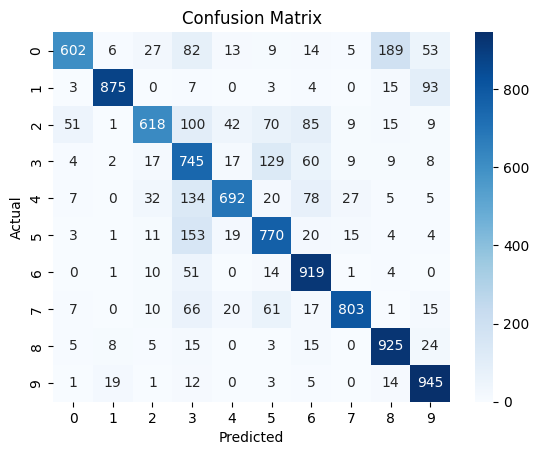

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Save the final model
model.save("cnn_model_final.h5")